Client_subscription.CSV code analysis 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data with the correct delimiter
df = pd.read_csv('/Users/stevenwang/Desktop/BIM master thesis/Data/Client_subscriptions.csv', delimiter=';')

# Print the first few rows to verify the data loading
print(df.head())

# Check the column names and print them
print("Column names in the DataFrame before cleaning:", df.columns)

# Clean the column names
df.columns = df.columns.str.strip().str.lower()
print("Cleaned column names in the DataFrame:", df.columns)

     id               created_at             cancelled_at  \
0  3511  2019-04-02 20:08:45 UTC  2021-04-03 20:08:45 UTC   
1  3372  2019-04-01 11:49:01 UTC  2021-04-02 11:49:01 UTC   
2  3376  2019-04-01 11:52:00 UTC  2021-04-02 11:52:00 UTC   
3  3370  2019-04-01 11:48:30 UTC  2021-04-02 11:48:30 UTC   
4  3181  2019-03-29 11:44:53 UTC  2021-03-30 12:44:53 UTC   

                expires_at  price subscription_period     status  user_id  \
0  2021-04-02 20:08:45 UTC    0.0              Yearly  Cancelled   158306   
1  2021-04-01 11:49:01 UTC    0.0              Yearly  Cancelled       43   
2  2021-04-01 11:52:00 UTC    0.0              Yearly  Cancelled    96465   
3  2021-04-01 11:48:30 UTC    0.0              Yearly  Cancelled    40173   
4  2021-03-29 12:44:53 UTC    0.0              Yearly  Cancelled    97088   

           expiration_date  
0  2021-04-02 20:08:45 UTC  
1  2021-04-01 11:49:01 UTC  
2  2021-04-01 11:52:00 UTC  
3  2021-04-01 11:48:30 UTC  
4  2021-03-29 12:44:53 UT

In [2]:
# Verify the presence of expected columns
expected_columns = ['id', 'created_at', 'cancelled_at', 'expires_at', 'price', 'subscription_period', 'status', 'user_id', 'expiration_date']
missing_columns = [col for col in expected_columns if col not in df.columns]
if missing_columns:
    print(f"Missing columns: {missing_columns}")
else:
    print("All expected columns are present.")


All expected columns are present.


In [3]:
# Convert date columns to datetime if they exist
date_columns = ['created_at', 'cancelled_at', 'expires_at', 'expiration_date']
for col in date_columns:
    if col in df.columns:
        df[col] = pd.to_datetime(df[col])

In [4]:
# Calculate subscription duration if the necessary columns are present
if 'created_at' in df.columns and 'expires_at' in df.columns:
    df['subscription_duration'] = (df['expires_at'] - df['created_at']).dt.days
    print("Subscription duration statistics:\n", df['subscription_duration'].describe())

Subscription duration statistics:
 count    95198.000000
mean       188.258272
std        264.984573
min       -335.000000
25%         31.000000
50%         90.000000
75%        242.000000
max       2191.000000
Name: subscription_duration, dtype: float64


Subscription status counts:
 status
Cancelled              87564
Active                  6888
Refunded                 741
Wait for activation        5
Name: count, dtype: int64


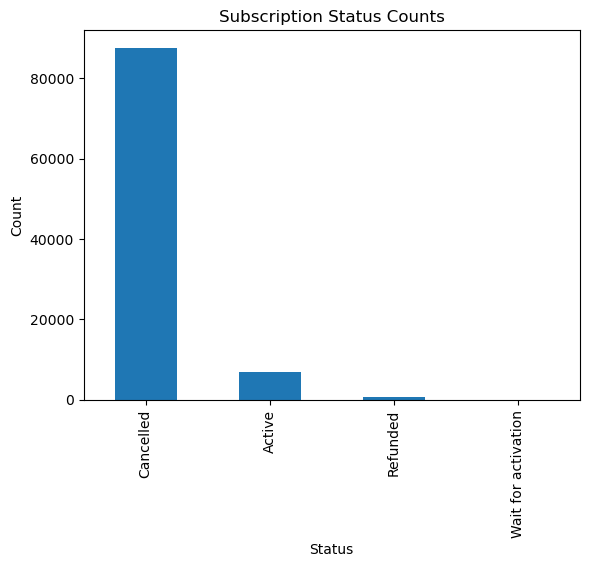

Subscription price statistics:
 count    95187.000000
mean        25.245737
std         26.750243
min          0.000000
25%         14.990000
50%         14.990000
75%         14.990000
max       3599.000000
Name: price, dtype: float64


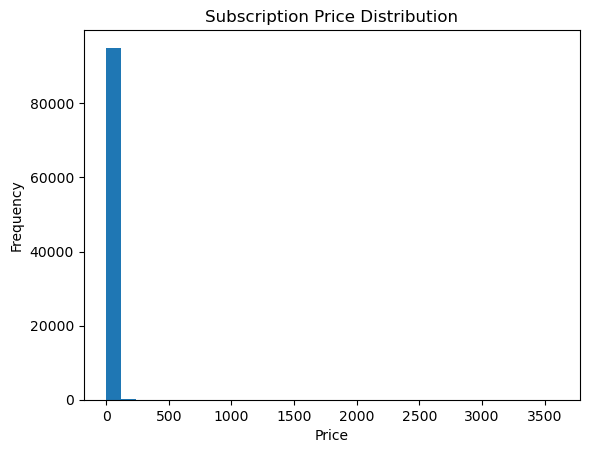

Number of unique users: 76299
Average subscriptions per user: 1.2476965622092033
Subscription period counts:
 subscription_period
Monthly      70509
Quarterly    13973
Yearly       10716
Name: count, dtype: int64


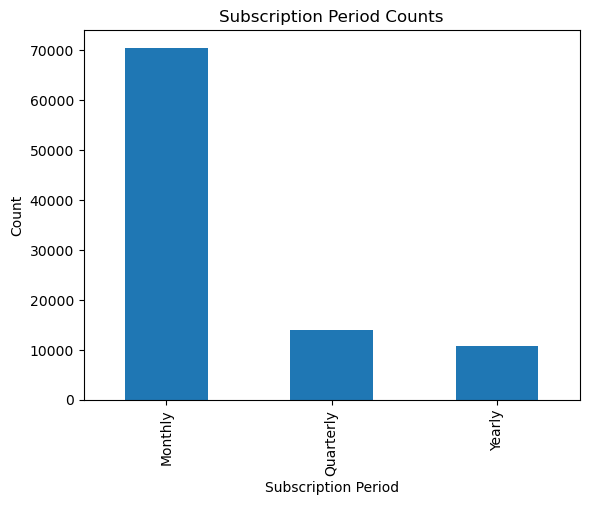

In [5]:
# Proceed with the rest of the analysis
if 'status' in df.columns:
    status_counts = df['status'].value_counts()
    print("Subscription status counts:\n", status_counts)

    status_counts.plot(kind='bar')
    plt.title('Subscription Status Counts')
    plt.xlabel('Status')
    plt.ylabel('Count')
    plt.show()
else:
    print("Column 'status' is missing from the DataFrame.")

if 'price' in df.columns:
    price_stats = df['price'].describe()
    print("Subscription price statistics:\n", price_stats)

    df['price'].plot(kind='hist', bins=30)
    plt.title('Subscription Price Distribution')
    plt.xlabel('Price')
    plt.ylabel('Frequency')
    plt.show()
else:
    print("Column 'price' is missing from the DataFrame.")

if 'user_id' in df.columns:
    unique_users = df['user_id'].nunique()
    print("Number of unique users:", unique_users)

    avg_subscriptions_per_user = df['user_id'].value_counts().mean()
    print("Average subscriptions per user:", avg_subscriptions_per_user)
else:
    print("Column 'user_id' is missing from the DataFrame.")

if 'subscription_period' in df.columns:
    period_counts = df['subscription_period'].value_counts()
    print("Subscription period counts:\n", period_counts)

    period_counts.plot(kind='bar')
    plt.title('Subscription Period Counts')
    plt.xlabel('Subscription Period')
    plt.ylabel('Count')
    plt.show()
else:
    print("Column 'subscription_period' is missing from the DataFrame.")

Cancellations.csv code analysis 

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the new data file with the correct delimiter and handle bad lines
file_path = '/Users/stevenwang/Desktop/BIM master thesis/Data/Cancellations.csv'
df = pd.read_csv(file_path, delimiter=';', on_bad_lines='skip', low_memory=False)


In [7]:
# Print the first few rows to verify the data loading
print(df.head())

# Check the column names and print them
print("Column names in the DataFrame before cleaning:", df.columns)


       id               created_at service_provider_id user_id task_id  \
0   14121  2018-01-23 20:58:25 UTC               15156   83553  115790   
1  132392  2023-03-22 11:50:49 UTC               18891   54498  785718   
2   87256  2021-07-14 09:39:46 UTC               88563   81844  393830   
3   57490  2020-06-09 11:04:04 UTC               30679  223289  321240   
4  132395  2023-03-22 11:53:14 UTC               94388  508564  837829   

  contract_id              reason  \
0         NaN  Client unreachable   
1     1604723  Client unreachable   
2         NaN  Client unreachable   
3         NaN  Client unreachable   
4     1708627  Client unreachable   

                                             comment      cancelled_by  \
0  Ik heb de klant gecontacteerd maar krijg geen ...  Service provider   
1  Je n'ai plus de nouvelles de valentin depuis 4...  Service provider   
2  J ai envoyer un message pour prendre rdv avec ...  Service provider   
3        ce client m a contacté et p

In [8]:
# Drop 'Unnamed' columns and completely empty columns
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
df = df.dropna(axis=1, how='all')


In [9]:
# Clean the column names
df.columns = df.columns.str.strip().str.lower()
print("Cleaned column names in the DataFrame:", df.columns)


Cleaned column names in the DataFrame: Index(['id', 'created_at', 'service_provider_id', 'user_id', 'task_id',
       'contract_id', 'reason', 'comment', 'cancelled_by'],
      dtype='object')


In [10]:
# Convert 'created_at' to string and filter out invalid entries
if 'created_at' in df.columns:
    df['created_at'] = df['created_at'].astype(str)
    valid_date_mask = df['created_at'].str.match(r'\d{4}-\d{2}-\d{2} \d{2}:\d{2}:\d{2} UTC')
    valid_dates_df = df[valid_date_mask]
    invalid_dates_df = df[~valid_date_mask]
    print("Invalid 'created_at' entries:", invalid_dates_df)

    # Use only valid datetime entries
    df = valid_dates_df.copy()

    # Convert 'created_at' to datetime
    df['created_at'] = pd.to_datetime(df['created_at'], format='%Y-%m-%d %H:%M:%S %Z')


Invalid 'created_at' entries:                                                       id  \
15                                                   NaN   
16                                               De plus   
64                 Dominique n’a plus donné de nouvelles   
65                                          Cordialement   
70                J' ai appelé ma cliente (zéro réponse)   
...                                                  ...   
66417                                                NaN   
66418  Het werk stemde niet overeen met de aanvraag.....   
66426  Pour faire plus simple regarder les demandes s...   
66427                                    Cordialement  "   
66434                                     trop éloigné."   

                                              created_at  \
15                                                   nan   
16                                         ni ListMinut    
64                                                   nan   
65       

In [11]:
# Basic overview of the data
print("Basic Data Overview:")
print(df.info())
print(df.describe())



Basic Data Overview:
<class 'pandas.core.frame.DataFrame'>
Index: 49196 entries, 0 to 66435
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype              
---  ------               --------------  -----              
 0   id                   49196 non-null  object             
 1   created_at           49196 non-null  datetime64[ns, UTC]
 2   service_provider_id  49195 non-null  object             
 3   user_id              49196 non-null  object             
 4   task_id              49192 non-null  object             
 5   contract_id          25097 non-null  object             
 6   reason               47546 non-null  object             
 7   comment              47732 non-null  object             
 8   cancelled_by         42457 non-null  object             
dtypes: datetime64[ns, UTC](1), object(8)
memory usage: 3.8+ MB
None
           id                           created_at service_provider_id  \
count   49196                                49196 

Cancellation reasons counts:
 reason
Other reason                                   19026
Another solution was found                      9791
Not needed anymore                              5146
Couldn't agree on a date                        3209
Service provide didn't show up                  2426
Service provider is not available anymore       2268
Service provider unreachable                    2230
No time to do the job                           1460
Work to do not matching the initial request      717
Price too high                                   644
Quote rejection                                  512
Client unreachable                                96
Withdrawal of service provider                    21
Name: count, dtype: int64


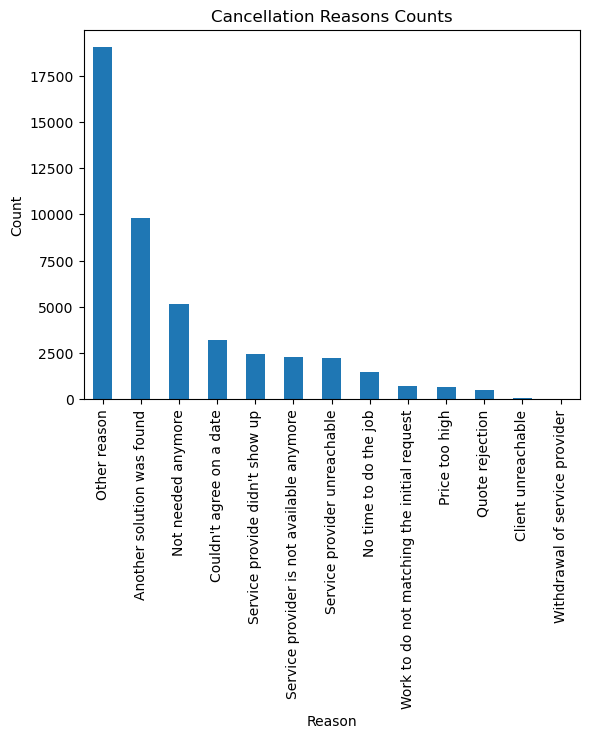

In [12]:
# Analyze cancellation reasons
if 'reason' in df.columns:
    reason_counts = df['reason'].value_counts()
    print("Cancellation reasons counts:\n", reason_counts)

    # Plot cancellation reasons counts
    reason_counts.plot(kind='bar')
    plt.title('Cancellation Reasons Counts')
    plt.xlabel('Reason')
    plt.ylabel('Count')
    plt.show()

In [13]:
# Analyze cancellations by user
if 'user_id' in df.columns:
    unique_users = df['user_id'].nunique()
    print("Number of unique users:", unique_users)

    cancellations_per_user = df['user_id'].value_counts()
    print("Cancellations per user statistics:\n", cancellations_per_user.describe())


Number of unique users: 32702
Cancellations per user statistics:
 count    32702.000000
mean         1.504373
std          1.549198
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max         84.000000
Name: count, dtype: float64


In [14]:
# Analyze cancellations by service provider
if 'service_provider_id' in df.columns:
    unique_service_providers = df['service_provider_id'].nunique()
    print("Number of unique service providers:", unique_service_providers)

    cancellations_per_provider = df['service_provider_id'].value_counts()
    print("Cancellations per service provider statistics:\n", cancellations_per_provider.describe())


Number of unique service providers: 16713
Cancellations per service provider statistics:
 count    16713.000000
mean         2.943517
std          5.173236
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max        135.000000
Name: count, dtype: float64


Cancellations over time:
 created_at
2018-01-31 00:00:00+00:00     343
2018-02-28 00:00:00+00:00     327
2018-03-31 00:00:00+00:00     363
2018-04-30 00:00:00+00:00     442
2018-05-31 00:00:00+00:00     573
                             ... 
2023-08-31 00:00:00+00:00    1111
2023-09-30 00:00:00+00:00    1183
2023-10-31 00:00:00+00:00    1094
2023-11-30 00:00:00+00:00    1046
2023-12-31 00:00:00+00:00     994
Freq: M, Length: 72, dtype: int64


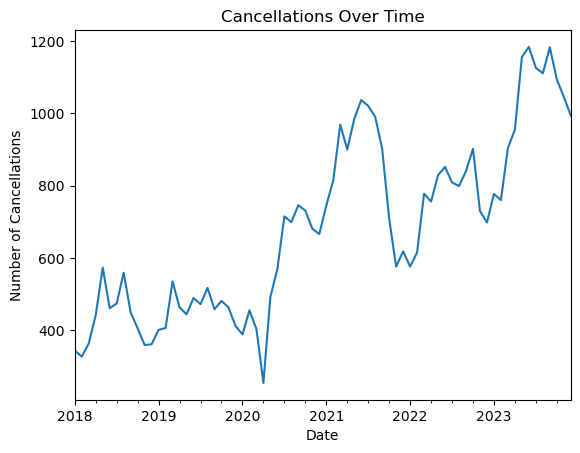

In [15]:
# Analyze cancellations over time if 'created_at' exists
if 'created_at' in df.columns:
    df.set_index('created_at', inplace=True)
    cancellations_over_time = df.resample('M').size()
    print("Cancellations over time:\n", cancellations_over_time)

    # Plot cancellations over time
    cancellations_over_time.plot(kind='line')
    plt.title('Cancellations Over Time')
    plt.xlabel('Date')
    plt.ylabel('Number of Cancellations')
    plt.show()

# analysis client subscription payments 

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data file with the correct delimiter
file_path = '/Users/stevenwang/Desktop/BIM master thesis/Data/Client_subscription_payments.csv'
df = pd.read_csv(file_path, delimiter=';')


In [24]:
# Print the first few rows to verify the data loading
print(df.head())

# Check the column names and print them
print("Column names in the DataFrame:", df.columns)

   payment_id               created_at  price  subscription_id payment_method
0      114806  2020-11-23 16:27:38 UTC    0.0            38912        Credits
1      122363  2020-12-23 12:25:21 UTC    0.0            40960        Credits
2      135984  2021-02-18 11:55:23 UTC    0.0            45056        Credits
3      114814  2020-11-23 17:30:46 UTC    0.0            38920        Credits
4      226547  2022-01-19 10:20:31 UTC    0.0            69648        Credits
Column names in the DataFrame: Index(['payment_id', 'created_at', 'price', 'subscription_id',
       'payment_method'],
      dtype='object')


In [25]:
# Clean the column names
df.columns = df.columns.str.strip().str.lower()
print("Cleaned column names in the DataFrame:", df.columns)

# Convert 'created_at' to datetime if it exists
if 'created_at' in df.columns:
    df['created_at'] = pd.to_datetime(df['created_at'])


Cleaned column names in the DataFrame: Index(['payment_id', 'created_at', 'price', 'subscription_id',
       'payment_method'],
      dtype='object')


In [26]:
# Basic overview of the data
print("Basic Data Overview:")
print(df.info())
print(df.describe())

Basic Data Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 349897 entries, 0 to 349896
Data columns (total 5 columns):
 #   Column           Non-Null Count   Dtype              
---  ------           --------------   -----              
 0   payment_id       349897 non-null  int64              
 1   created_at       349897 non-null  datetime64[ns, UTC]
 2   price            349897 non-null  float64            
 3   subscription_id  349897 non-null  int64              
 4   payment_method   349897 non-null  object             
dtypes: datetime64[ns, UTC](1), float64(1), int64(2), object(1)
memory usage: 13.3+ MB
None
          payment_id          price  subscription_id
count  349897.000000  349897.000000    349897.000000
mean   188462.039020      20.632519     45552.876744
std    107898.873537      17.265162     26908.273179
min         1.000000       0.000000         1.000000
25%     94925.000000      14.990000     22395.000000
50%    188764.000000      14.990000     44321.

Payment method counts:
 payment_method
Credit card      338282
Bancontact         5818
Credits            3195
Bank transfer      2602
Name: count, dtype: int64


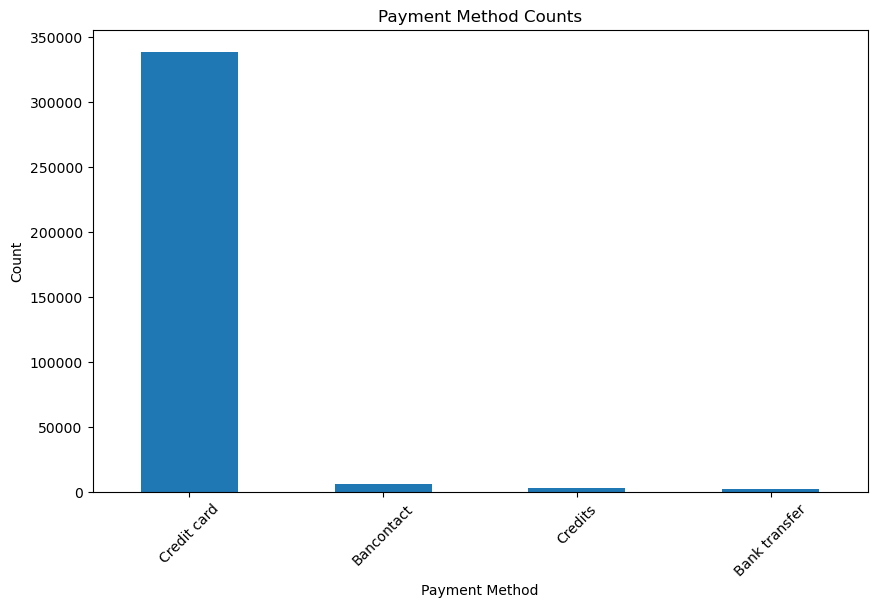

In [27]:
# Analyze payment methods
if 'payment_method' in df.columns:
    payment_method_counts = df['payment_method'].value_counts()
    print("Payment method counts:\n", payment_method_counts)

    # Plot payment method counts
    plt.figure(figsize=(10, 6))
    payment_method_counts.plot(kind='bar')
    plt.title('Payment Method Counts')
    plt.xlabel('Payment Method')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

Subscription price statistics:
 count    349897.000000
mean         20.632519
std          17.265162
min           0.000000
25%          14.990000
50%          14.990000
75%          14.990000
max         149.880000
Name: price, dtype: float64


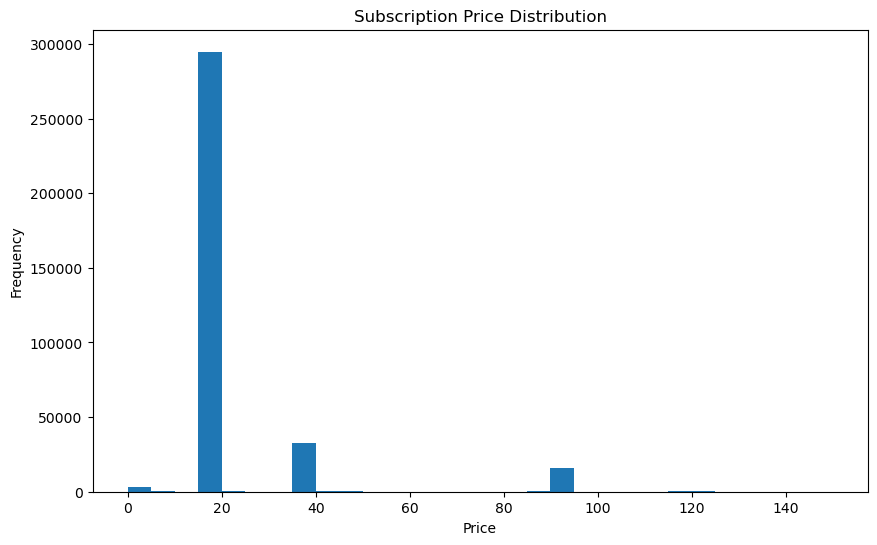

In [28]:
# Analyze subscription prices
if 'price' in df.columns:
    price_stats = df['price'].describe()
    print("Subscription price statistics:\n", price_stats)

    # Plot distribution of subscription prices
    plt.figure(figsize=(10, 6))
    df['price'].plot(kind='hist', bins=30)
    plt.title('Subscription Price Distribution')
    plt.xlabel('Price')
    plt.ylabel('Frequency')
    plt.show()

Payments over time:
 created_at
2018-08-31 00:00:00+00:00      62
2018-09-30 00:00:00+00:00     284
2018-10-31 00:00:00+00:00     432
2018-11-30 00:00:00+00:00     491
2018-12-31 00:00:00+00:00     518
                             ... 
2024-01-31 00:00:00+00:00    2765
2024-02-29 00:00:00+00:00    2747
2024-03-31 00:00:00+00:00       3
2024-04-30 00:00:00+00:00       1
2024-05-31 00:00:00+00:00       1
Freq: M, Length: 70, dtype: int64


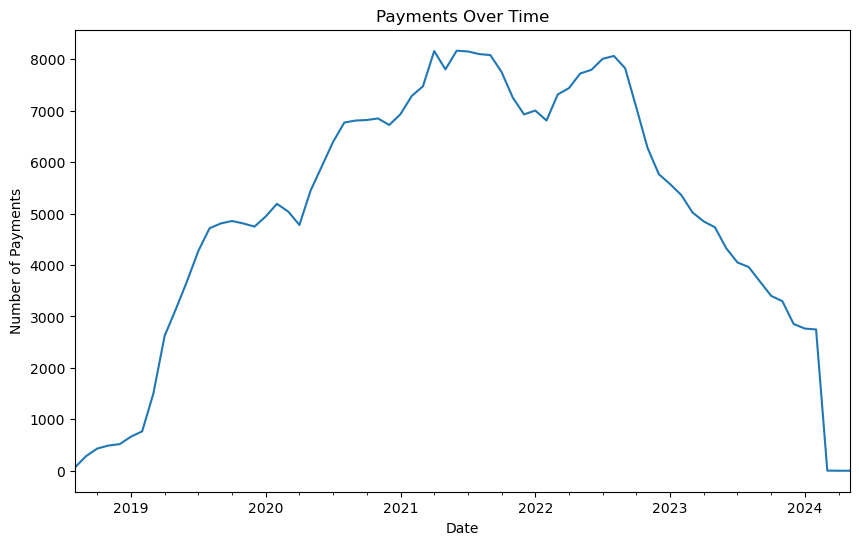

In [29]:
# Analyze subscriptions over time if 'created_at' exists
if 'created_at' in df.columns:
    df.set_index('created_at', inplace=True)
    payments_over_time = df.resample('M').size()
    print("Payments over time:\n", payments_over_time)

    # Plot payments over time
    plt.figure(figsize=(10, 6))
    payments_over_time.plot(kind='line')
    plt.title('Payments Over Time')
    plt.xlabel('Date')
    plt.ylabel('Number of Payments')
    plt.show()

Contracts.csv code analysis 

In [37]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = '/Users/stevenwang/Desktop/BIM master thesis/Data/Contracts.csv'
df = pd.read_csv(file_path, delimiter=';')

In [38]:
# Print the first few rows to verify the data loading
print(df.head())

# Check the column names and print them
print("Column names in the DataFrame:", df.columns)

        id               created_at   status  service_provider_id  task_id  \
0  1495947  2022-06-13 22:56:09 UTC  Deleted               196611   724909   
1  1555656  2022-08-19 23:55:19 UTC  Deleted               204803   759561   
2  1634470  2022-11-15 10:21:15 UTC  Deleted               204803   801040   
3   565356  2019-11-03 11:11:22 UTC  Deleted                47107   295858   
4  1097651  2021-04-27 14:41:03 UTC  Deleted                47107   514345   

  pricing_type              assigned_at  conversation_id assignment_method  \
0    Hour rate  2022-06-15 22:22:39 UTC        1672288.0               NaN   
1    Hour rate                      NaN        1754073.0               NaN   
2    Hour rate                      NaN        1860069.0               NaN   
3    Hour rate                      NaN         554565.0               NaN   
4    Hour rate                      NaN        1142415.0               NaN   

  closing_method             cancelled_at  formula_page_seen  

In [39]:
# Clean the column names
df.columns = df.columns.str.strip().str.lower()
print("Cleaned column names in the DataFrame:", df.columns)


Cleaned column names in the DataFrame: Index(['id', 'created_at', 'status', 'service_provider_id', 'task_id',
       'pricing_type', 'assigned_at', 'conversation_id', 'assignment_method',
       'closing_method', 'cancelled_at', 'formula_page_seen'],
      dtype='object')


In [40]:
# Convert relevant columns to datetime
date_columns = ['created_at', 'assigned_at', 'cancelled_at']
for col in date_columns:
    if col in df.columns:
        df[col] = pd.to_datetime(df[col], errors='coerce')
        
# Basic overview of the data
print("Basic Data Overview:")
print(df.info())
print(df.describe())


Basic Data Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 12 columns):
 #   Column               Non-Null Count    Dtype              
---  ------               --------------    -----              
 0   id                   1048575 non-null  int64              
 1   created_at           1048575 non-null  datetime64[ns, UTC]
 2   status               1048575 non-null  object             
 3   service_provider_id  1048575 non-null  int64              
 4   task_id              1048575 non-null  int64              
 5   pricing_type         1048575 non-null  object             
 6   assigned_at          105780 non-null   datetime64[ns, UTC]
 7   conversation_id      1032886 non-null  float64            
 8   assignment_method    43765 non-null    object             
 9   closing_method       50427 non-null    object             
 10  cancelled_at         25975 non-null    datetime64[ns, UTC]
 11  formula_page_seen    1048575 

Contract status counts:
 status
Deleted      591957
Refused      224550
Assigned     166386
Awaiting      40727
Cancelled     24955
Name: count, dtype: int64


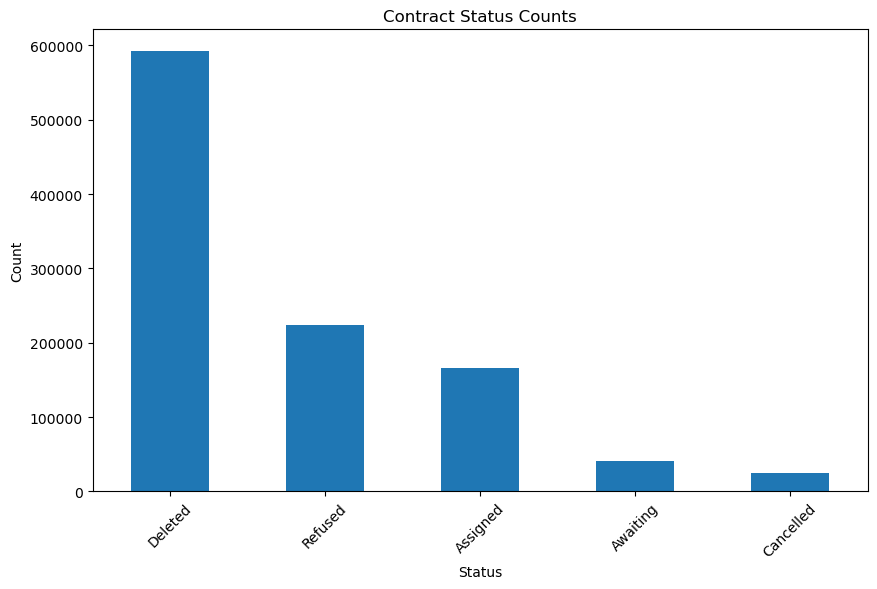

In [41]:
# Analyze contract status
if 'status' in df.columns:
    status_counts = df['status'].value_counts()
    print("Contract status counts:\n", status_counts)

    # Plot contract status counts
    plt.figure(figsize=(10, 6))
    status_counts.plot(kind='bar')
    plt.title('Contract Status Counts')
    plt.xlabel('Status')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

Pricing type counts:
 pricing_type
Hour rate     789538
Flat rate     255683
Estimation      3354
Name: count, dtype: int64


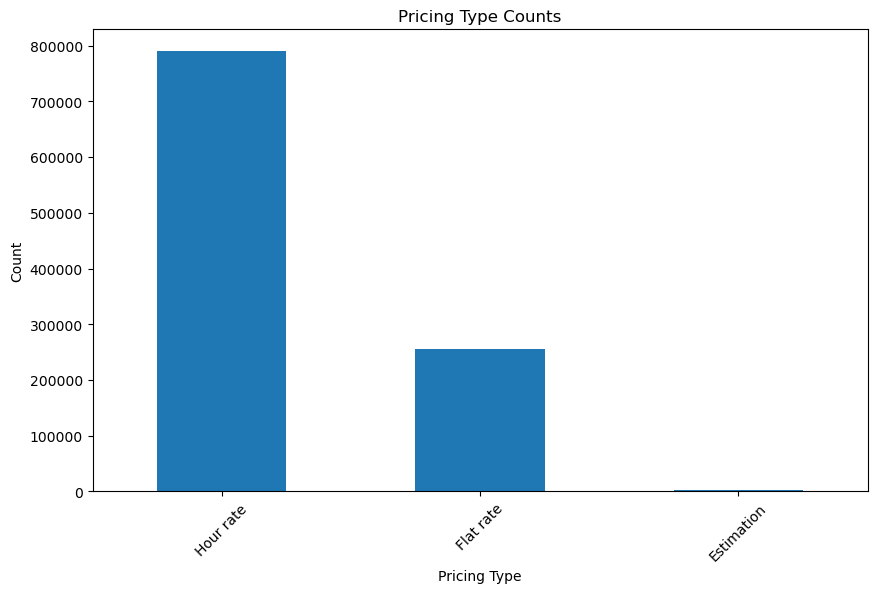

In [42]:
# Analyze pricing types
if 'pricing_type' in df.columns:
    pricing_type_counts = df['pricing_type'].value_counts()
    print("Pricing type counts:\n", pricing_type_counts)

    # Plot pricing type counts
    plt.figure(figsize=(10, 6))
    pricing_type_counts.plot(kind='bar')
    plt.title('Pricing Type Counts')
    plt.xlabel('Pricing Type')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

Contracts over time:
 created_at
2018-01-31 00:00:00+00:00     2440
2018-02-28 00:00:00+00:00     2891
2018-03-31 00:00:00+00:00     3980
2018-04-30 00:00:00+00:00     4409
2018-05-31 00:00:00+00:00     4478
                             ...  
2023-08-31 00:00:00+00:00    22054
2023-09-30 00:00:00+00:00    21980
2023-10-31 00:00:00+00:00    22947
2023-11-30 00:00:00+00:00    20995
2023-12-31 00:00:00+00:00    17371
Freq: M, Length: 72, dtype: int64


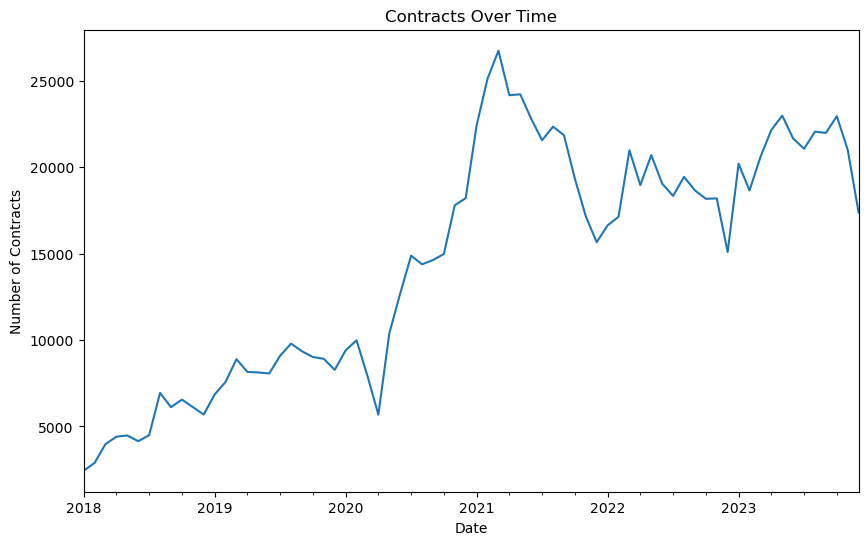

In [44]:
# Analyze contracts over time if 'created_at' exists
if 'created_at' in df.columns:
    df.set_index('created_at', inplace=True)
    contracts_over_time = df.resample('M').size()
    print("Contracts over time:\n", contracts_over_time)

    # Plot contracts over time
    plt.figure(figsize=(10, 6))
    contracts_over_time.plot(kind='line')
    plt.title('Contracts Over Time')
    plt.xlabel('Date')
    plt.ylabel('Number of Contracts')
    plt.show()


Assignment method counts:
 assignment_method
service_fee     27032
subscription    16733
Name: count, dtype: int64


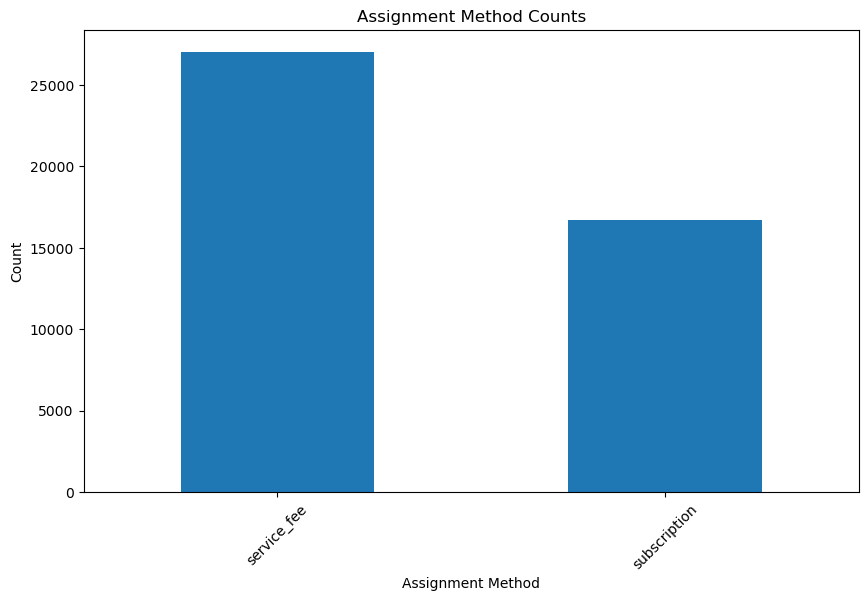

In [45]:
# Reset index for further analysis
df.reset_index(inplace=True)

# Analyze assignment method
if 'assignment_method' in df.columns:
    assignment_method_counts = df['assignment_method'].value_counts()
    print("Assignment method counts:\n", assignment_method_counts)

    # Plot assignment method counts
    plt.figure(figsize=(10, 6))
    assignment_method_counts.plot(kind='bar')
    plt.title('Assignment Method Counts')
    plt.xlabel('Assignment Method')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

Closing method counts:
 closing_method
subscription    30387
service_fee     20040
Name: count, dtype: int64


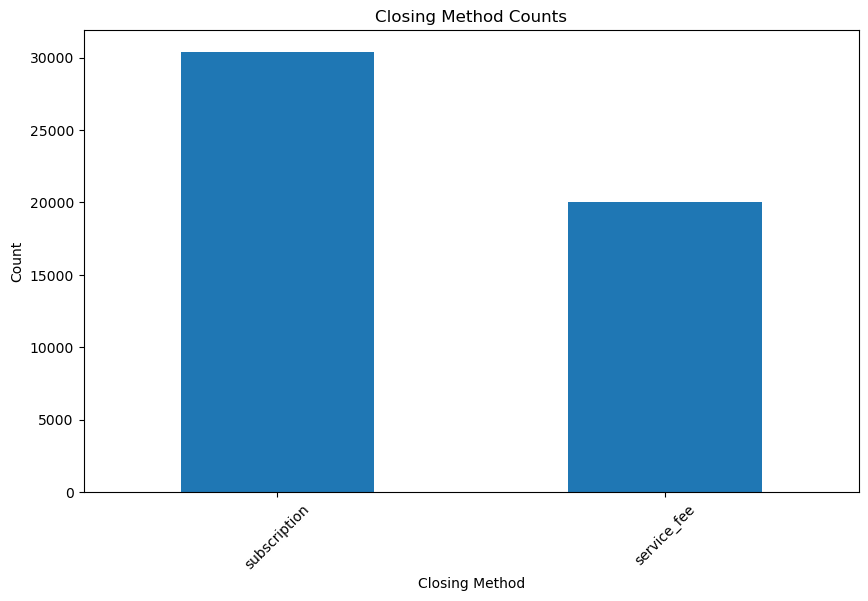

In [46]:
# Analyze closing method
if 'closing_method' in df.columns:
    closing_method_counts = df['closing_method'].value_counts()
    print("Closing method counts:\n", closing_method_counts)

    # Plot closing method counts
    plt.figure(figsize=(10, 6))
    closing_method_counts.plot(kind='bar')
    plt.title('Closing Method Counts')
    plt.xlabel('Closing Method')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

Formula page seen counts:
 formula_page_seen
False    1008399
True       40176
Name: count, dtype: int64


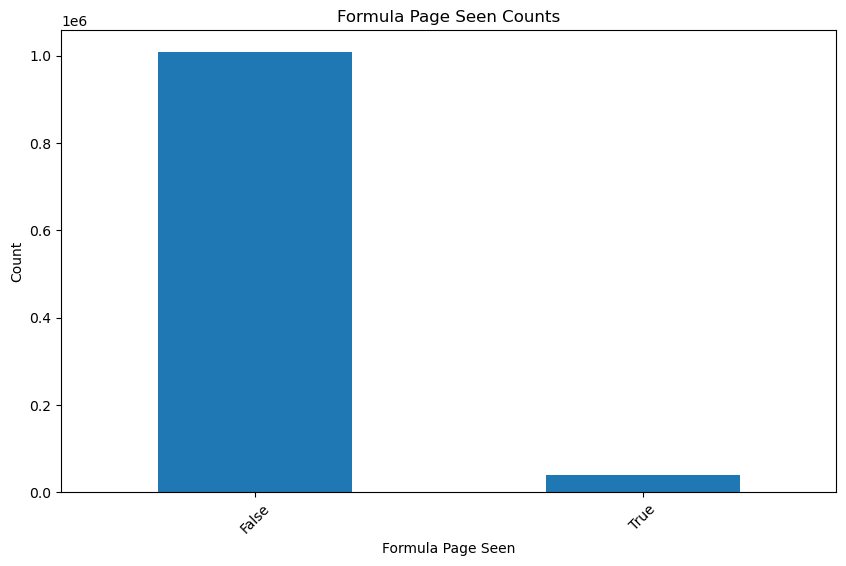

In [47]:
# Analyze formula page seen
if 'formula_page_seen' in df.columns:
    formula_page_seen_counts = df['formula_page_seen'].value_counts()
    print("Formula page seen counts:\n", formula_page_seen_counts)

    # Plot formula page seen counts
    plt.figure(figsize=(10, 6))
    formula_page_seen_counts.plot(kind='bar')
    plt.title('Formula Page Seen Counts')
    plt.xlabel('Formula Page Seen')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

Ratings.csv code analysis 

In [54]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data file with the correct delimiter and specify data types to avoid warnings
file_path = '/Users/stevenwang/Desktop/BIM master thesis/Data/Ratings.csv'
df = pd.read_csv(file_path, delimiter=';', low_memory=False)

In [55]:
# Print the first few rows to verify the data loading
print(df.head())

# Check the column names and print them
print("Column names in the DataFrame:", df.columns)

  rating_id               created_at contract_id service_provider_id rate  \
0    144581  2022-05-30 22:20:18 UTC     1453467              128247    5   
1    154212  2022-09-25 20:38:42 UTC     1568213              204803    5   
2    158091  2022-11-10 20:53:33 UTC     1615358              204803    5   
3    157474  2022-11-03 14:27:05 UTC     1614490              204803    5   
4    156310  2022-10-20 15:35:49 UTC     1601231              204803    5   

                                             comment Unnamed: 6 Unnamed: 7  
0  Tout est parfait avec Wafae, et toujours avec ...        NaN        NaN  
1  Uitstekend werk geleverd, aangenaam in de omga...        NaN        NaN  
2  Goed werk afgeleverd, zeer tevreden. Komt de a...        NaN        NaN  
3  Maxim is een heel professioneel, punctueel en ...        NaN        NaN  
4  Erg professioneel, zeer vriendelijk en goed do...        NaN        NaN  
Column names in the DataFrame: Index(['rating_id', 'created_at', 'contract_

In [56]:
# Clean the column names
df.columns = df.columns.str.strip().str.lower()
print("Cleaned column names in the DataFrame:", df.columns)

# Drop unnecessary 'unnamed' columns
df = df.loc[:, ~df.columns.str.contains('^unnamed')]

Cleaned column names in the DataFrame: Index(['rating_id', 'created_at', 'contract_id', 'service_provider_id', 'rate',
       'comment', 'unnamed: 6', 'unnamed: 7'],
      dtype='object')


In [53]:
# Clean 'rating_id' and 'contract_id' columns to keep only numeric values
df['rating_id'] = pd.to_numeric(df['rating_id'], errors='coerce')
df['contract_id'] = pd.to_numeric(df['contract_id'], errors='coerce')

# Drop rows with NaN values in 'rating_id' and 'contract_id' after conversion
df.dropna(subset=['rating_id', 'contract_id'], inplace=True)


Basic Data Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177342 entries, 0 to 177341
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype              
---  ------               --------------   -----              
 0   rating_id            159798 non-null  object             
 1   created_at           136588 non-null  datetime64[ns, UTC]
 2   contract_id          137485 non-null  object             
 3   service_provider_id  136866 non-null  object             
 4   rate                 136675 non-null  object             
 5   comment              134945 non-null  object             
 6   unnamed: 6           7 non-null       object             
 7   unnamed: 7           2 non-null       object             
dtypes: datetime64[ns, UTC](1), object(7)
memory usage: 10.8+ MB
None
       rating_id                           created_at contract_id  \
count     159798                               136588      137485   
unique    154912               

In [57]:
# Convert relevant columns to datetime
if 'created_at' in df.columns:
    df['created_at'] = pd.to_datetime(df['created_at'], errors='coerce')

# Convert rate to numeric, coerce errors
if 'rate' in df.columns:
    df['rate'] = pd.to_numeric(df['rate'], errors='coerce')

# Basic overview of the data
print("Basic Data Overview:")
print(df.info())
print(df.describe())

Basic Data Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177342 entries, 0 to 177341
Data columns (total 6 columns):
 #   Column               Non-Null Count   Dtype              
---  ------               --------------   -----              
 0   rating_id            159798 non-null  object             
 1   created_at           136588 non-null  datetime64[ns, UTC]
 2   contract_id          137485 non-null  object             
 3   service_provider_id  136866 non-null  object             
 4   rate                 136588 non-null  float64            
 5   comment              134945 non-null  object             
dtypes: datetime64[ns, UTC](1), float64(1), object(4)
memory usage: 8.1+ MB
None
                rate
count  136588.000000
mean        4.923595
std         0.367417
min         0.000000
25%         5.000000
50%         5.000000
75%         5.000000
max         5.000000


Rating counts:
 rate
0.0         4
1.0       388
2.0       303
3.0      1123
4.0      5709
5.0    129061
Name: count, dtype: int64


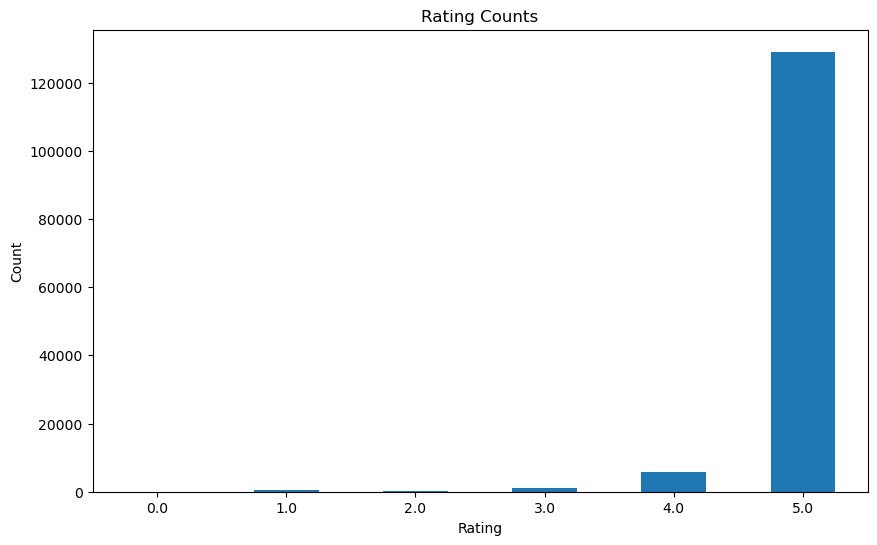

In [58]:
# Analyze ratings
if 'rate' in df.columns:
    rating_counts = df['rate'].value_counts().sort_index()
    print("Rating counts:\n", rating_counts)

    # Plot rating counts
    plt.figure(figsize=(10, 6))
    rating_counts.plot(kind='bar')
    plt.title('Rating Counts')
    plt.xlabel('Rating')
    plt.ylabel('Count')
    plt.xticks(rotation=0)
    plt.show()

Ratings over time:
 created_at
2018-01-31 00:00:00+00:00     649
2018-02-28 00:00:00+00:00     652
2018-03-31 00:00:00+00:00     785
2018-04-30 00:00:00+00:00    1024
2018-05-31 00:00:00+00:00    1182
                             ... 
2023-08-31 00:00:00+00:00    2495
2023-09-30 00:00:00+00:00    2578
2023-10-31 00:00:00+00:00    2376
2023-11-30 00:00:00+00:00    2612
2023-12-31 00:00:00+00:00    2332
Name: rate, Length: 72, dtype: int64


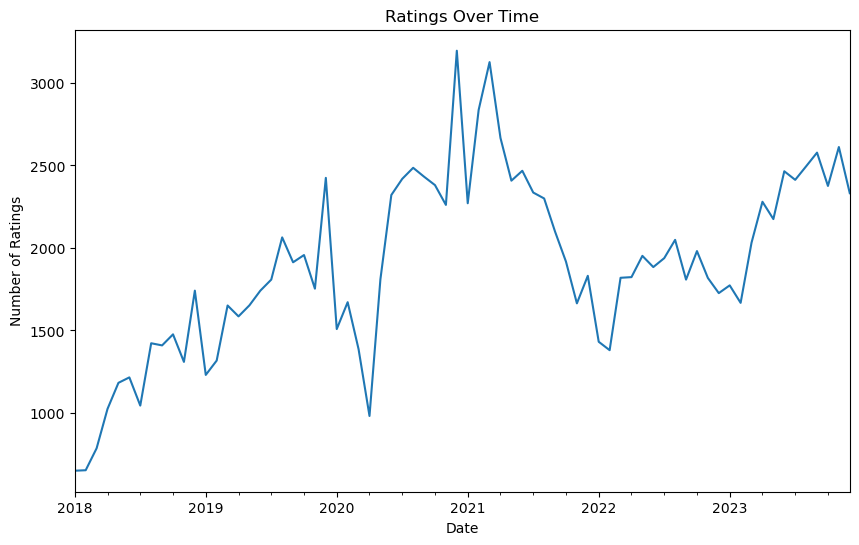

In [59]:
# Analyze ratings over time if 'created_at' exists
if 'created_at' in df.columns:
    df.set_index('created_at', inplace=True)
    ratings_over_time = df['rate'].resample('M').count()
    print("Ratings over time:\n", ratings_over_time)

    # Plot ratings over time
    plt.figure(figsize=(10, 6))
    ratings_over_time.plot(kind='line')
    plt.title('Ratings Over Time')
    plt.xlabel('Date')
    plt.ylabel('Number of Ratings')
    plt.show()

Average rating by service provider:
 service_provider_id
100000                                                                      5.0
45497                                                                       5.0
45268                                                                       5.0
45273                                                                       5.0
45351                                                                       5.0
                                                                           ... 
inzicht en vakmanschap.Werkt door                                           NaN
maîtrise de son travail.                                                    NaN
perfectionniste                                                             NaN
prix raisonnable et tout ça avec le sourire! 😊...que demander de plus???    NaN
travail propre et professionnel                                             NaN
Name: rate, Length: 14440, dtype: float64


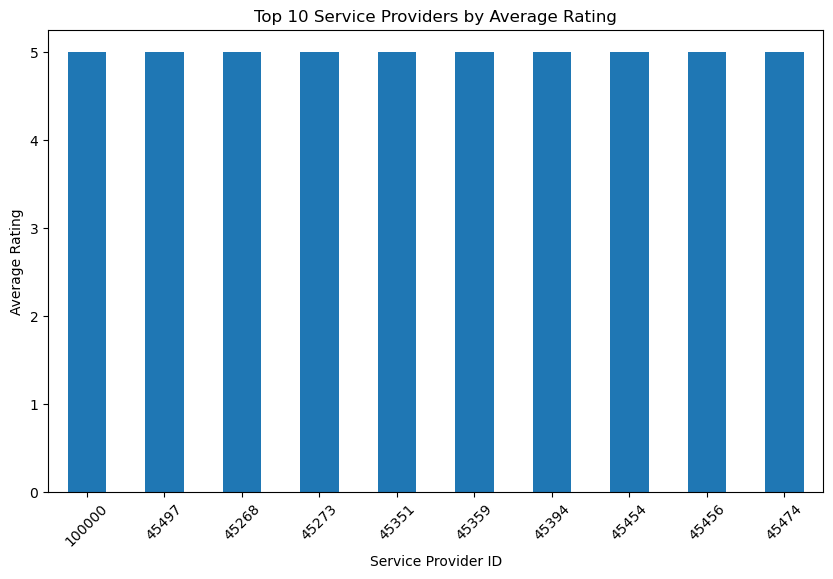

In [60]:
# Reset index for further analysis
df.reset_index(inplace=True)

# Analyze ratings by service provider
if 'service_provider_id' in df.columns:
    provider_rating_counts = df.groupby('service_provider_id')['rate'].mean().sort_values(ascending=False)
    print("Average rating by service provider:\n", provider_rating_counts)

    # Plot average rating by service provider
    top_providers = provider_rating_counts.head(10)  # Display top 10 service providers
    plt.figure(figsize=(10, 6))
    top_providers.plot(kind='bar')
    plt.title('Top 10 Service Providers by Average Rating')
    plt.xlabel('Service Provider ID')
    plt.ylabel('Average Rating')
    plt.xticks(rotation=45)
    plt.show()

Comment length statistics:
 count    177342.000000
mean         47.684305
std          52.608039
min           1.000000
25%           5.000000
50%          31.000000
75%          66.000000
max         861.000000
Name: comment_length, dtype: float64


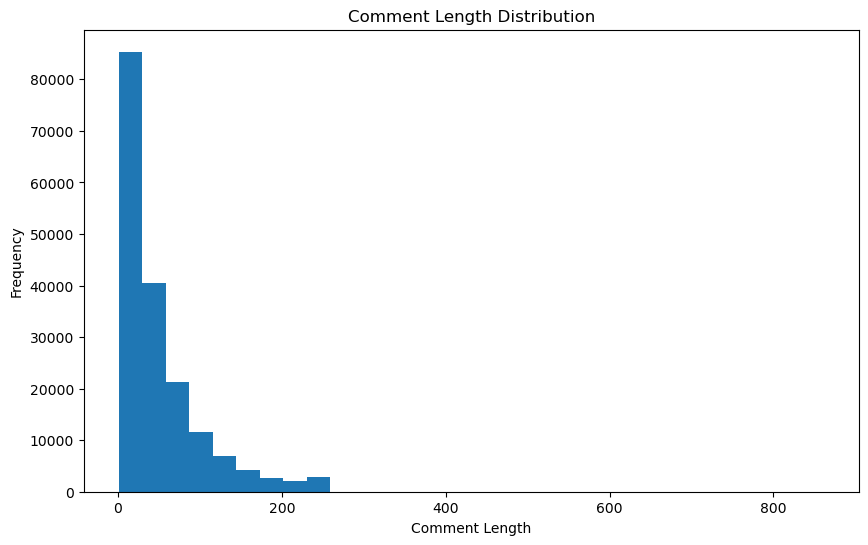

In [61]:
# Analyze comments length if 'comment' exists
if 'comment' in df.columns:
    df['comment_length'] = df['comment'].astype(str).apply(len)
    comment_length_stats = df['comment_length'].describe()
    print("Comment length statistics:\n", comment_length_stats)

    # Plot distribution of comment lengths
    plt.figure(figsize=(10, 6))
    df['comment_length'].plot(kind='hist', bins=30)
    plt.title('Comment Length Distribution')
    plt.xlabel('Comment Length')
    plt.ylabel('Frequency')
    plt.show()

SyntaxError: invalid syntax (308587892.py, line 1)

  Obtaining dependency information for wordcloud from https://files.pythonhosted.org/packages/ac/66/937d1d73389c0b501c928c4d8513653063d2b40272dff70d0e283d8b9144/wordcloud-1.9.3-cp311-cp311-macosx_11_0_arm64.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 168.3/168.3 kB 5.0 MB/s eta 0:00:00


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/stevenwang/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


  rating_id               created_at contract_id service_provider_id rate  \
0    144581  2022-05-30 22:20:18 UTC     1453467              128247    5   
1    154212  2022-09-25 20:38:42 UTC     1568213              204803    5   
2    158091  2022-11-10 20:53:33 UTC     1615358              204803    5   
3    157474  2022-11-03 14:27:05 UTC     1614490              204803    5   
4    156310  2022-10-20 15:35:49 UTC     1601231              204803    5   

                                             comment Unnamed: 6 Unnamed: 7  
0  Tout est parfait avec Wafae, et toujours avec ...        NaN        NaN  
1  Uitstekend werk geleverd, aangenaam in de omga...        NaN        NaN  
2  Goed werk afgeleverd, zeer tevreden. Komt de a...        NaN        NaN  
3  Maxim is een heel professioneel, punctueel en ...        NaN        NaN  
4  Erg professioneel, zeer vriendelijk en goed do...        NaN        NaN  
Column names in the DataFrame: Index(['rating_id', 'created_at', 'contract_

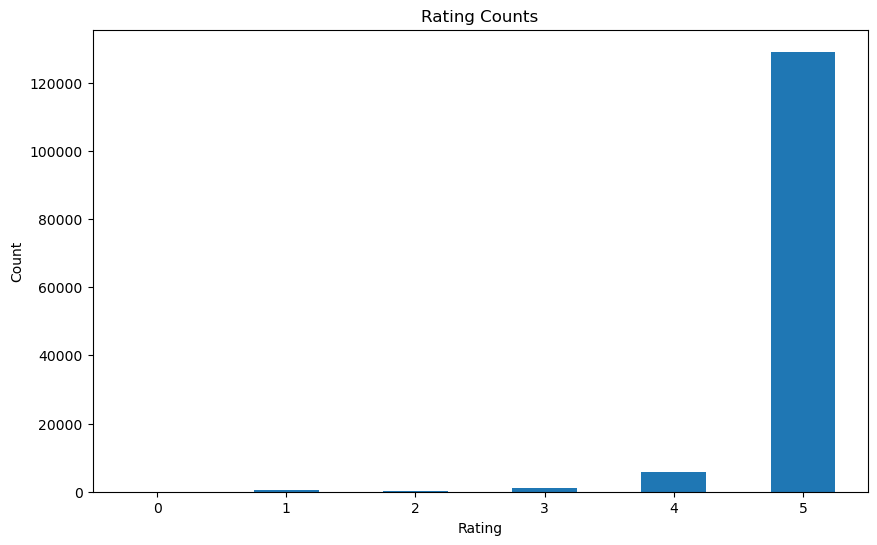

Ratings over time:
 created_at
2018-01-31 00:00:00+00:00     649
2018-02-28 00:00:00+00:00     652
2018-03-31 00:00:00+00:00     785
2018-04-30 00:00:00+00:00    1024
2018-05-31 00:00:00+00:00    1182
                             ... 
2023-08-31 00:00:00+00:00    2495
2023-09-30 00:00:00+00:00    2578
2023-10-31 00:00:00+00:00    2376
2023-11-30 00:00:00+00:00    2612
2023-12-31 00:00:00+00:00    2332
Freq: M, Name: rate, Length: 72, dtype: int64


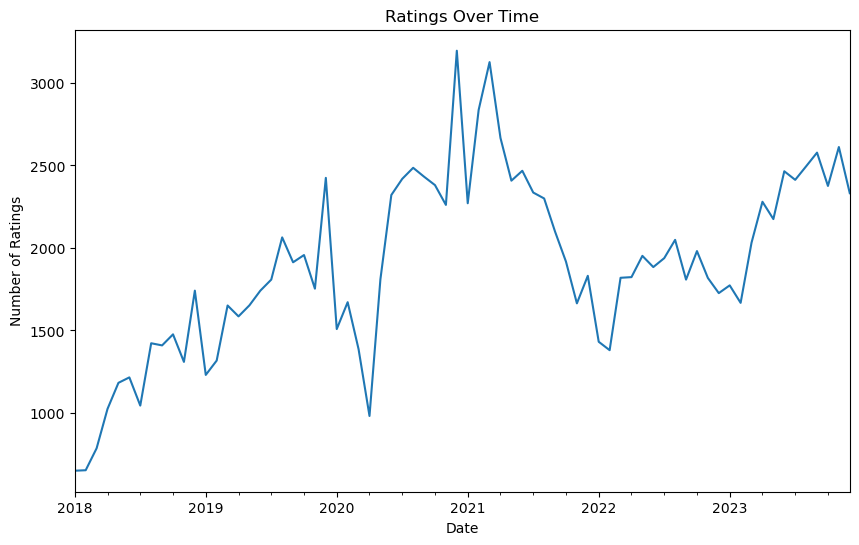

Average rating by service provider:
 service_provider_id
100000    5.0
45497     5.0
45268     5.0
45273     5.0
45351     5.0
         ... 
51640     1.0
58594     1.0
65063     1.0
49802     0.0
237776    0.0
Name: rate, Length: 14176, dtype: float64


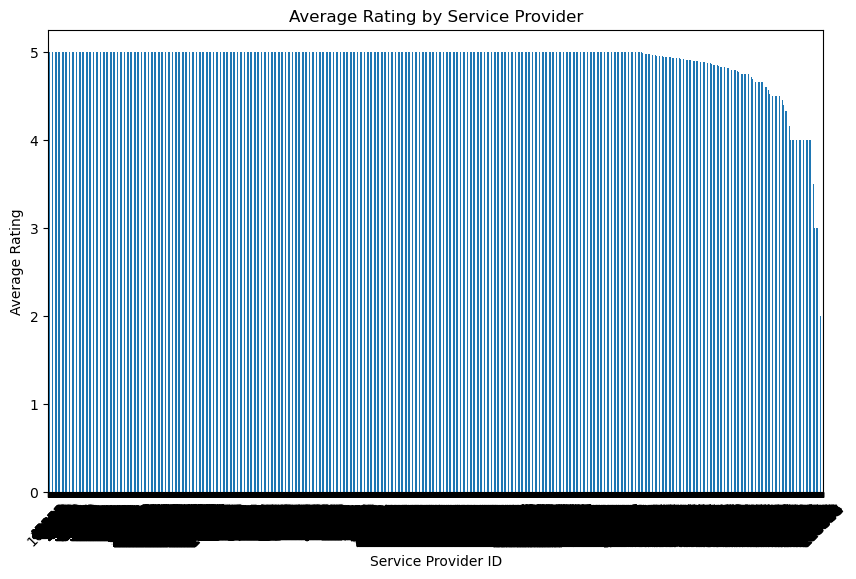

Most common words in comments:
 [('très', 22838), ('Très', 13984), ('travail', 12052), ('Merci', 10751), ('bien', 8704), ('recommande', 7992), ('Super', 7054), ('bon', 6732), ('een', 6540), ('Travail', 6369), ('werk', 6212), ('goed', 6105), ('merci', 5613), ('bonne', 5360), ('prestation', 5215), ('Zeer', 5137), ('zeer', 4907), ('efficace', 4907), ('van', 4754), ('service', 4424)]


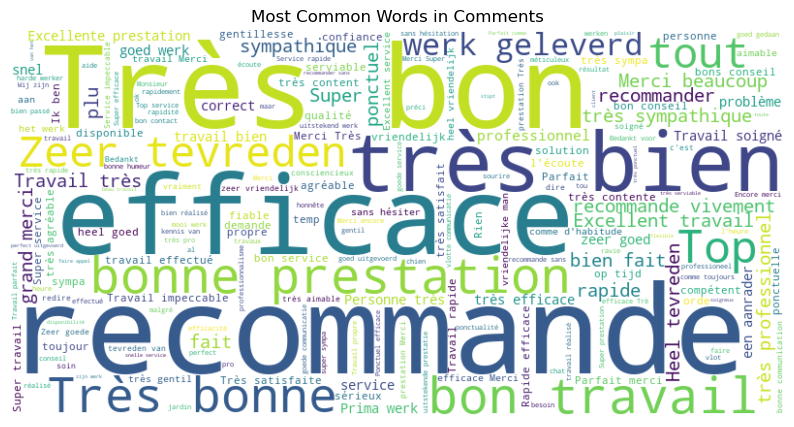

In [70]:
!pip install wordcloud
!pip install nltk

import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
import string


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/stevenwang/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Average rating by service provider:
 service_provider_id
100000    5.0
45497     5.0
45268     5.0
45273     5.0
45351     5.0
         ... 
51640     1.0
58594     1.0
65063     1.0
49802     0.0
237776    0.0
Name: rate, Length: 14176, dtype: float64


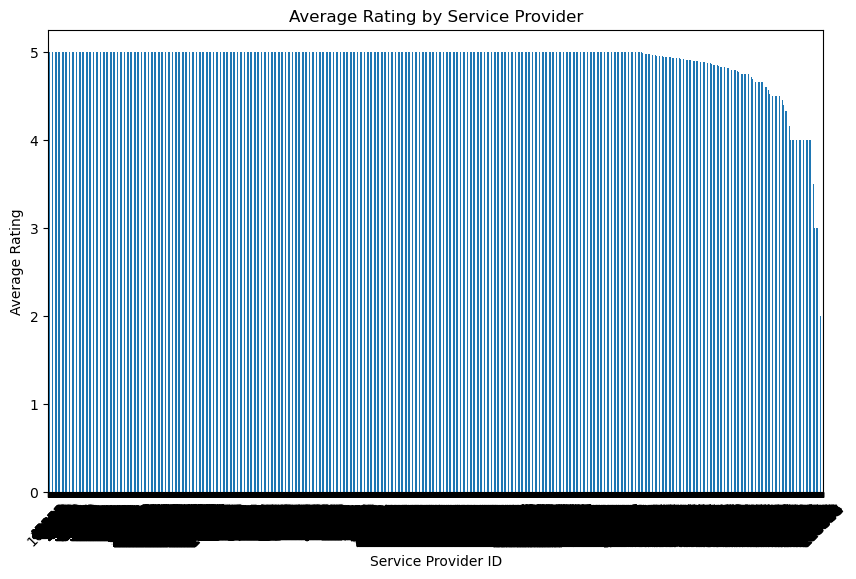

In [71]:
# Ensure the required nltk data is downloaded
nltk.download('stopwords')

# Analyze average rating by service provider
if 'service_provider_id' in df.columns:
    provider_rating_averages = df.groupby('service_provider_id')['rate'].mean().sort_values(ascending=False)
    print("Average rating by service provider:\n", provider_rating_averages)

    # Plot average rating by service provider
    plt.figure(figsize=(10, 6))
    provider_rating_averages.plot(kind='bar')
    plt.title('Average Rating by Service Provider')
    plt.xlabel('Service Provider ID')
    plt.ylabel('Average Rating')
    plt.xticks(rotation=45)
    plt.show()

Most common words in comments:
 [('très', 22838), ('Très', 13984), ('travail', 12052), ('Merci', 10751), ('bien', 8704), ('recommande', 7992), ('Super', 7054), ('bon', 6732), ('een', 6540), ('Travail', 6369), ('werk', 6212), ('goed', 6105), ('merci', 5613), ('bonne', 5360), ('prestation', 5215), ('Zeer', 5137), ('zeer', 4907), ('efficace', 4907), ('van', 4754), ('service', 4424)]


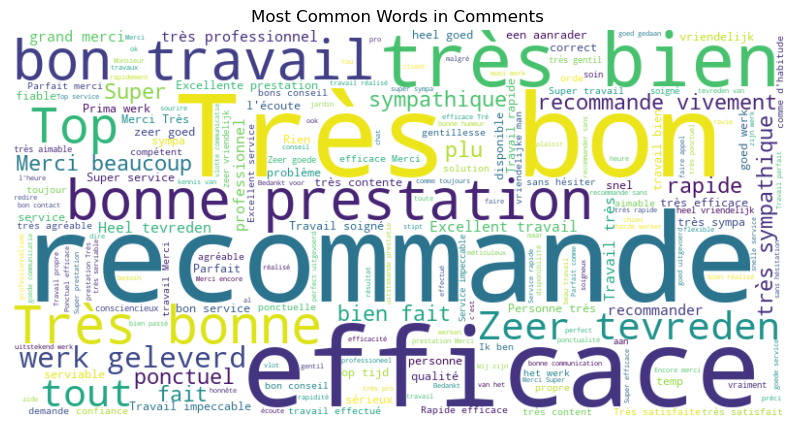

In [72]:
# Analyze most used words in comments
if 'comment' in df.columns:
    # Combine all comments into one string
    all_comments = ' '.join(df['comment'].dropna().astype(str))

    # Tokenize the words and filter out stopwords and punctuation
    stop_words = set(stopwords.words('english') + stopwords.words('french') + list(string.punctuation))
    words = [word for word in all_comments.split() if word.lower() not in stop_words and word.isalpha()]

    # Count the frequency of each word
    word_freq = Counter(words)
    common_words = word_freq.most_common(20)
    print("Most common words in comments:\n", common_words)

    # Generate a word cloud
    wordcloud = WordCloud(stopwords=stop_words, background_color='white', width=800, height=400).generate(all_comments)

    # Plot the word cloud
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title('Most Common Words in Comments')
    plt.show()